# Putting Your Data in Drive: Understanding Parking Database through Jupyter Notebooks



## Expected Outcomes from this section

<ol>
<li>Load the data</li>
<li> Tabulate the data</li>
<li>Visualize the data</li>
<li>Calculate the amount of parking in a particular area</li>
<li>Ways to build on databse:Linear Analysis</li>


## Part 1: Load the Data 

### Import Packages 

In [ ]:
#Our first step is to get the data from the parking github page in csv format. 
#CSV format is a delimited text file that uses a comma to separate values. With comma as a separator with fields it allows you to import sheets from Excel which is a powerful tool for data analysis and documentation.
#https://ruilee16.github.io/sfba_parking/

In [1]:
pip install geopandas # allows us to work with spatial data in python 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 

### Yellow Light: What's the data again?
This data includes the amount of parking spaces in the San Francisco Bay Area. It is organized and tabulated by on-street or off-street, residential or not-residential, and other classifications. In this notebook we will explain all the different applications of the data.

This parking database was creating by cross-referencing regional and parcel data with municipal off-street parking requirements. The results can be downloaded here: https://ruilee16.github.io/sfba_parking/

In [ ]:
## For the code to work make sure this is in the right folder 

In [4]:
# # First attempt in trying to find the parking density path on Maya's computer 
import os
os.getcwd()

'/Users/mayalove/Desktop/Data Science Materials/Projects'

In [5]:
os.listdir()

['General Proofing Exercise.docx',
 'ALS - Data Engineering Exercise.docx',
 '.DS_Store',
 'Client Comms - Data Engineering.docx',
 'Amy:Mapping Bay Area Parking_DRAFT.ipynb',
 'SalesData.xlsx',
 'pythontoexcelpandas.ipynb',
 'pdf_to_excel.ipynb',
 'ml_nlppropertynews_fedchi.ipynb',
 'parking_density_acre.csv',
 'MachineLove2.png',
 'Analytics - Spreadsheet Results.docx',
 'Stock Indicator Project using Forest Classifier .docx',
 'Segmentation Quality Assurance Exercise - 2019.docx',
 'MachineLove1.png',
 'setuppython.py',
 'Maya:SFBA Parking Database How to Workshop.ipynb',
 'SalesReport.xlsx',
 'MACD.ipynb',
 'How to Create Excel Report Automation by Rune.ipynb',
 'ptax_July30_200articles.txt',
 'output.xlsx',
 'setuppython',
 '.ipynb_checkpoints',
 'testnews.PDF',
 'Machine3.png',
 'dc.txt',
 's4_3_Mapping_Essential_Workers.ipynb',
 'pythontoexcelpandas.py',
 'parking_density_acre.shp',
 'ptax_July30_200articles.pdf',
 'hprice1.pdf']

In [4]:
# # Read in the CSV file 
#Name the CSV file "parking"
#read the blkgrid in as a string 
# a string is an ordered collection of characters 
parking = pd.read_csv("parking_density_acre.csv", dtype={'blkgrpid':str})
print(parking)
# #dtype function is used to create a data type object. defines how bytes in memory will be interpreted by a scalar or an array and the way in which the bytes will be treated
parking.head()

      OID_      blkgrpid  on_acre  on_res_ac  on_nre_ac  off_acre  off_res_ac  \
0        0  060014001001     4.39       2.48       1.91      5.88        1.82   
1        1  060014002001    11.90       8.11       3.79     12.76        6.25   
2        2  060014002002    14.11       3.64      10.47      7.43        6.22   
3        3  060014003001    10.44       5.71       4.72      8.61        7.20   
4        4  060014003002    16.91      10.41       6.50     15.24       10.88   
...    ...           ...      ...        ...        ...       ...         ...   
4741  4741  060971543031     0.56       0.56       0.00      0.05        0.04   
4742  4742  060971543032     1.61       1.61       0.00      0.18        0.18   
4743  4743  060971543041     0.38       0.38       0.00      0.00        0.00   
4744  4744  060971543042     0.53       0.53       0.00      0.03        0.03   
4745  4745  060971543043     0.32       0.32       0.00      0.05        0.04   

      off_nre_ac  re_acre  

,OID_,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area
0,0,060014001001,4.39,2.48,1.91,5.88,1.82,4.06,4.30,5.98,10.28,7483.3,10024.0,17507.3,3105.0,6919.0,0.144231,0.000706
1,1,060014002001,11.90,8.11,3.79,12.76,6.25,6.50,14.36,10.29,24.65,847.0,908.0,1755.0,445.0,463.0,0.031774,0.000029
2,2,060014002002,14.11,3.64,10.47,7.43,6.22,1.21,9.86,11.68,21.54,1040.6,548.0,1588.6,459.0,89.0,0.033831,0.000031
3,3,060014003001,10.44,5.71,4.72,8.61,7.20,1.40,12.92,6.13,19.04,685.3,565.0,1250.3,473.0,92.0,0.025534,0.000027
4,4,060014003002,16.91,10.41,6.50,15.24,10.88,4.36,21.29,10.85,32.14,1125.3,1014.0,2139.3,724.0,290.0,0.036617,0.000028


In [5]:
parking.head()
parking.tail()
parking.rename(columns={"OID_":"OID", #object ID
                "blkgrpid":"blkgrpid", # Block Group ID
                "on_acre":"on_acre", # on-street parking spaces per acre
                "on_res_ac":"on_res", # on-street residential parking spaces per acre
                "on_nre_ac":"on_nonres", # on-street non-residential parking spaces per acre
                "off_acre":"off_acre", # off-street parking spaces per acre
                "off_res_ac":"off_res", #o ff-street residential parking spaces per acre
                "off_nre_ac":"off_nonres", # off-street non-residential parking spaces per acre
                "re_acre":"res_acre", # residential spaces per acre
                "nonre_acre":"nonres_acre", # non-residential spaces per acre
                "all_acre":"all_acre", # all parking spaces per acre
                "on_all":"on_all", # all on-street parking spaces
                "off_all":"off_all", # all off-street parking spaces
                "all_sp":"all_sp", # all parking spaces
                "off_res":"off_res", # off-street residential spaces
                "off_nres":"off_nonres", # off-street non-residential spaces
            }, inplace=True)
# inplace = True means it will return nothing and the dataframe is now updated. False returns a data frame with dropped rows 


In [6]:
parking.head() # looking at the dataframe with renamed columns



,OID,blkgrpid,on_acre,on_res,on_nonres,off_acre,off_res,off_nonres,res_acre,nonres_acre,all_acre,on_all,off_all,all_sp,off_res,off_nonres,Shape_Leng,Shape_Area
0,0,060014001001,4.39,2.48,1.91,5.88,1.82,4.06,4.30,5.98,10.28,7483.3,10024.0,17507.3,3105.0,6919.0,0.144231,0.000706
1,1,060014002001,11.90,8.11,3.79,12.76,6.25,6.50,14.36,10.29,24.65,847.0,908.0,1755.0,445.0,463.0,0.031774,0.000029
2,2,060014002002,14.11,3.64,10.47,7.43,6.22,1.21,9.86,11.68,21.54,1040.6,548.0,1588.6,459.0,89.0,0.033831,0.000031
3,3,060014003001,10.44,5.71,4.72,8.61,7.20,1.40,12.92,6.13,19.04,685.3,565.0,1250.3,473.0,92.0,0.025534,0.000027
4,4,060014003002,16.91,10.41,6.50,15.24,10.88,4.36,21.29,10.85,32.14,1125.3,1014.0,2139.3,724.0,290.0,0.036617,0.000028


In [7]:
parking.describe()

,OID,on_acre,on_res,on_nonres,off_acre,off_res,off_nonres,res_acre,nonres_acre,all_acre,on_all,off_all,all_sp,off_res,off_nonres,Shape_Leng,Shape_Area
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2372.500000,10.219770,7.413266,2.806610,9.723192,6.751500,2.971702,14.164684,5.778291,19.943028,1819.107132,1345.670249,3164.777381,805.989043,539.681205,0.060949,0.000393
std,1370.196519,4.753017,4.009688,2.793706,9.080179,5.000727,7.759407,7.532399,9.016918,11.554960,3249.832460,2376.551126,4553.211026,568.260130,2274.697238,0.116949,0.003291
min,0.000000,-0.300000,-1.810000,0.000000,0.000000,0.000000,0.000000,-0.030000,0.000000,0.040000,-152.900000,0.000000,13.000000,0.000000,0.000000,0.005209,0.000002
25%,1186.250000,7.282500,4.600000,0.490000,4.982500,3.332500,0.010000,9.080000,1.330000,13.970000,682.000000,561.000000,1338.645000,429.250000,4.000000,0.023903,0.000026
50%,2372.500000,10.480000,7.440000,2.270000,8.390000,6.275000,0.520000,14.430000,3.520000,19.650000,1173.700000,903.500000,2193.150000,697.000000,68.000000,0.033526,0.000046
75%,3558.750000,13.147500,9.997500,4.150000,12.037500,9.030000,2.817500,18.767500,6.837500,24.817500,2011.625000,1428.750000,3518.850000,1068.000000,326.000000,0.051675,0.000092
max,4745.000000,36.090000,36.090000,21.380000,154.970000,59.530000,154.940000,69.270000,168.500000,169.700000,109459.900000,82876.000000,117139.900000,6007.000000,80544.000000,2.699449,0.156273


In [9]:
len(parking)

4746

## Part 2: Tabulate the data 

In [12]:
#create a sum of each column
parking.sum(axis=0, skipna = True)

OID            1.125988e+07
blkgrpid                inf
on_acre        4.850303e+04
on_res         3.518336e+04
on_nonres      1.332017e+04
off_acre       4.614627e+04
off_res        3.204262e+04
off_nonres     1.410370e+04
res_acre       6.722559e+04
nonres_acre    2.742377e+04
all_acre       9.464961e+04
on_all         8.633482e+06
off_all        6.386551e+06
all_sp         1.502003e+07
off_res        3.825224e+06
off_nonres     2.561327e+06
Shape_Leng     2.892643e+02
Shape_Area     1.865457e+00
dtype: float64

In [ ]:
# We can see the sum of different types of parking spaces in the Bay Area. For example there are 48,503.03 on street parking spaces per acre

## Part 3: Visualize the Data

In [ ]:
# creating the bar plot

In [13]:
Spaces = ['on_res', 'on_nonres', 'off_res', 'off_nonres']
Bay_Area_ParkingTypes = [35183.36, 13320.17, 32042.62, 14103.70]

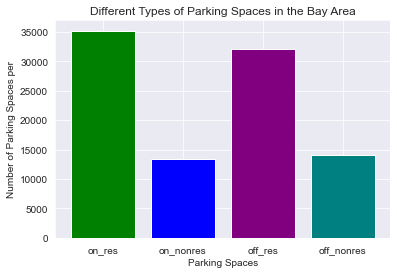

In [14]:
import matplotlib.pyplot as plt 

New_Colors = ['green', 'blue', 'purple', 'teal']

plt.bar(Spaces, Bay_Area_ParkingTypes, color=New_Colors)
plt.title('Different Types of Parking Spaces in the Bay Area')
plt.xlabel('Parking Spaces')
plt.ylabel('Number of Parking Spaces per')
plt.show()

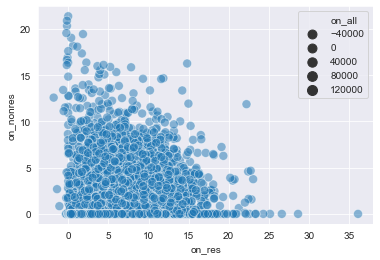

In [17]:
## Bubble Chart 
import matplotlib.pyplot as plt
import seaborn as sns

#set the theme of the grid
sns.set_style("darkgrid")
 
# use the scatterplot function
sns.scatterplot(data=parking, x="on_res", y="off_res", size="on_all", palette="viridis", alpha=0.5, sizes=(80,100))

# show the graph
plt.show()

## Part 4: Calculate the Amont of Parking in a Particular Area

In [39]:
os.listdir()

['General Proofing Exercise.docx',
 'ALS - Data Engineering Exercise.docx',
 '.DS_Store',
 'Client Comms - Data Engineering.docx',
 'Amy:Mapping Bay Area Parking_DRAFT.ipynb',
 'SalesData.xlsx',
 'pythontoexcelpandas.ipynb',
 'pdf_to_excel.ipynb',
 'ml_nlppropertynews_fedchi.ipynb',
 'parking_density_acre.csv',
 'MachineLove2.png',
 'Analytics - Spreadsheet Results.docx',
 'Stock Indicator Project using Forest Classifier .docx',
 'Segmentation Quality Assurance Exercise - 2019.docx',
 'MachineLove1.png',
 'setuppython.py',
 'Maya:SFBA Parking Database How to Workshop.ipynb',
 'SalesReport.xlsx',
 'MACD.ipynb',
 'How to Create Excel Report Automation by Rune.ipynb',
 'ptax_July30_200articles.txt',
 'output.xlsx',
 'setuppython',
 '.ipynb_checkpoints',
 'testnews.PDF',
 'Machine3.png',
 'dc.txt',
 's4_3_Mapping_Essential_Workers.ipynb',
 'pythontoexcelpandas.py',
 'parking_density_acre.shp',
 'ptax_July30_200articles.pdf',
 'hprice1.pdf']

In [41]:
# Let's look at the data visually by uploading the shapefile to Python

# Read file using gpd.read_file()
parking_map = gpd.read_file('parking_density_acre.shp')

# Display the map
parking_map

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
0,060014001001,4.39,2.48,1.91,5.88,1.82,4.06,4.30,5.98,10.28,7483.3,10024.0,17507.3,3105.0,6919.0,0.144231,0.000706,"POLYGON ((-122.21320 37.85760, -122.21313 37.8..."
1,060014002001,11.90,8.11,3.79,12.76,6.25,6.50,14.36,10.29,24.65,847.0,908.0,1755.0,445.0,463.0,0.031774,0.000029,"POLYGON ((-122.24404 37.85026, -122.24409 37.8..."
2,060014002002,14.11,3.64,10.47,7.43,6.22,1.21,9.86,11.68,21.54,1040.6,548.0,1588.6,459.0,89.0,0.033831,0.000031,"POLYGON ((-122.24372 37.84851, -122.24550 37.8..."
3,060014003001,10.44,5.71,4.72,8.61,7.20,1.40,12.92,6.13,19.04,685.3,565.0,1250.3,473.0,92.0,0.025534,0.000027,"POLYGON ((-122.24540 37.84580, -122.24608 37.8..."
4,060014003002,16.91,10.41,6.50,15.24,10.88,4.36,21.29,10.85,32.14,1125.3,1014.0,2139.3,724.0,290.0,0.036617,0.000028,"POLYGON ((-122.25081 37.83713, -122.25084 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,060971543031,0.56,0.56,0.00,0.05,0.04,0.01,0.60,0.01,0.61,15054.6,1335.0,16389.6,1181.0,154.0,1.247763,0.011265,"MULTIPOLYGON (((-123.40847 38.65423, -123.4085..."
4742,060971543032,1.61,1.61,0.00,0.18,0.18,0.00,1.79,0.00,1.79,10015.5,1121.0,11136.5,1118.0,3.0,0.575204,0.002606,"MULTIPOLYGON (((-123.40615 38.65714, -123.4061..."
4743,060971543041,0.38,0.38,0.00,0.00,0.00,0.00,0.38,0.00,0.38,68937.0,721.0,69658.0,545.0,176.0,1.758323,0.076115,"POLYGON ((-123.26871 38.80837, -123.26881 38.8..."
4744,060971543042,0.53,0.53,0.00,0.03,0.03,0.00,0.56,0.00,0.56,10422.5,555.0,10977.5,521.0,34.0,0.528839,0.008153,"MULTIPOLYGON (((-123.12787 38.43937, -123.1274..."


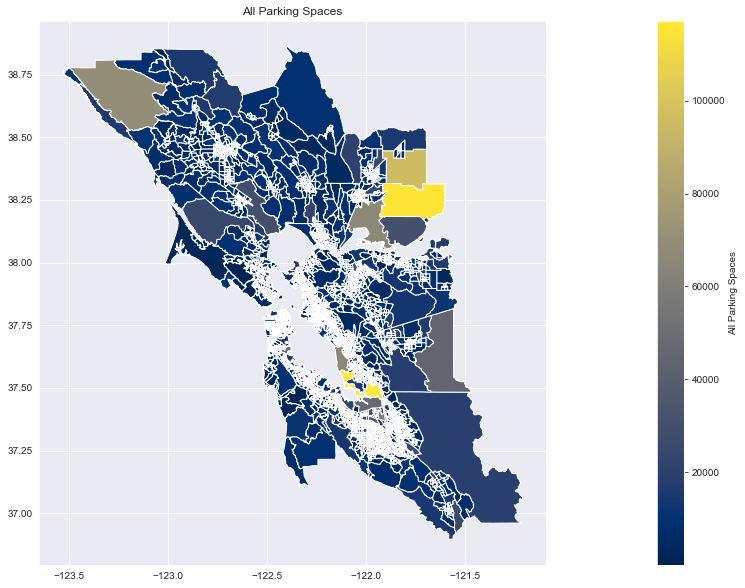

In [51]:
# Plot with data as choropleth
## This is very crude and needs work! But the start of some visualization code
fig, ax = plt.subplots(figsize = (40,10)) 

parking_map.plot(column='all_sp', 
              cmap='cividis',
            #where do you add color 
              legend=True,
              legend_kwds={'label': "All Parking Spaces",
                           'orientation': "vertical"},
              ax=ax)
ax.set_title("All Parking Spaces")
plt.show()

### Q1: What if I just want to look at parking supply in a specific area?

As introduced above, the data is organized by Block Group ID. So, we need to identify the block group ID numbers for the outlined geographies above.

To do this, we will start by looking at the federal government's map of Census Block Group ID geographies here: https://data.census.gov/cedsci/map?t=Commuting%3AEmployment&g=0500000US06085%241500000&mode=selection&vintage=2020&layer=VT_2020_150_00_PY_D1

The bold red text is the tract #. Within each tract # there are additional light red lines with single digits on them (1-4), that is the block group ID.

Let's say we wanted to isolate the parking supply outside Diridon station, a popular transit station in San Jose. I would need to identify the block group IDs that encompass the geographic area around Diridon Station using the link above. 

*Maya, block group IDs are complicated! Let's work together on how to explain/use them in week 3. For now, you can use this section to work on what someone might do after they have isolated the Block Group IDs they are interested in.*

The Block Group IDs we will use to look at parking just around San Jose Diridon station are: 060855003001, 060855003002, 06085501901, 060855019021, 060855008001

In [45]:
# Tell python these are the Block Group IDs we are interested in
# Group them
# Subset data to only tracts in the Bay Area
SJ_parking = parking_map[(parking_map["blkgrpid"]=="060855003001")
                    | (parking_map["blkgrpid"]=="060855003002")
                    | (parking_map["blkgrpid"]=="060855019001") #OID 3067 in dataset - confirm with Rui why this doesn't match the tract + block group ID structure
                    | (parking_map["blkgrpid"]=="060855019002") #OID 3068 same
                    | (parking_map["blkgrpid"]=="060855008002")
                    | (parking_map["blkgrpid"]=="060855008001")].copy().reset_index(drop=True)

#Another question for Rui is that for tract 5008 on the census website there is 5008 blkgrpid 1, 2, 3. Is this becuase this area got a new block group in 2020? Verify in social explorer.

# Display SJ_Parking
SJ_parking

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
0,060855003001,5.63,2.26,3.37,8.24,0.47,7.76,2.73,11.13,13.86,3129.5,4583.0,7712.5,264.0,4319.0,0.071761,0.000229,"POLYGON ((-121.90920 37.35048, -121.90904 37.3..."
1,060855003002,8.82,4.39,4.43,10.60,6.26,4.34,10.65,8.77,19.42,1463.0,1757.0,3220.0,1038.0,719.0,0.035705,0.000068,"POLYGON ((-121.90019 37.32661, -121.90027 37.3..."
2,060855008001,9.95,3.28,6.68,110.45,0.36,110.10,3.63,116.77,120.41,2228.6,24733.0,26961.6,80.0,24653.0,0.049654,0.000092,"POLYGON ((-121.89057 37.33617, -121.89050 37.3..."
3,060855008002,7.64,3.88,3.76,8.24,1.98,6.27,5.86,10.03,15.89,1458.6,1573.0,3031.6,377.0,1196.0,0.053280,0.000079,"POLYGON ((-121.89217 37.32375, -121.89232 37.3..."
4,060855019001,8.27,2.92,5.35,13.82,2.87,10.95,5.79,16.30,22.09,2418.9,4043.0,6461.9,839.0,3204.0,0.047891,0.000120,"POLYGON ((-121.90223 37.31870, -121.90238 37.3..."
5,060855019002,9.82,4.99,4.83,5.45,4.23,1.22,9.22,6.05,15.27,878.9,488.0,1366.9,379.0,109.0,0.028087,0.000037,"POLYGON ((-121.90414 37.31262, -121.90432 37.3..."


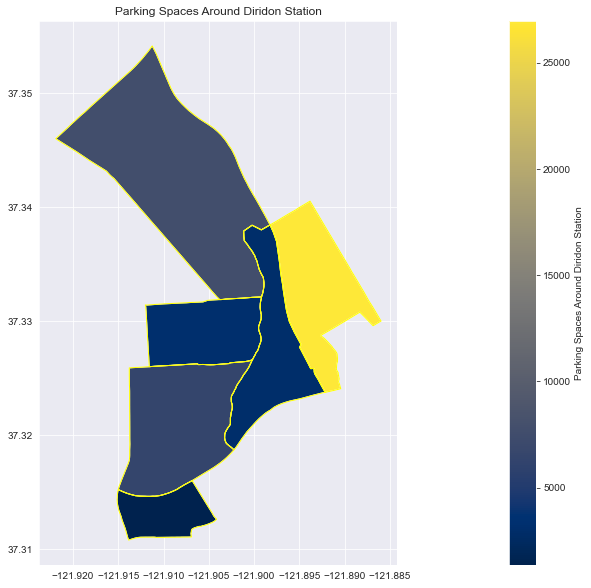

In [78]:
# Plot SJ data as choropleth
## This is very crude and needs work! But the start of some visualization code
fig, ax = plt.subplots(figsize = (40,10)) 
SJ_parking.plot(column='all_sp', 
              cmap='cividis',
              legend=True,
              legend_kwds={'label': "Parking Spaces Around Diridon Station",
                           'orientation': "vertical"},
              ax=ax)
 
SJ_parking.plot(ax=ax, color="none", edgecolor="yellow") # putting an edgecolor 

ax.set_title("Parking Spaces Around Diridon Station")
plt.show()

## Part 5: Ways to build on the database: Linear Analysis 

In [ ]:
####  Household Dataframe 

In [16]:
household = pd.read_csv('EstimatedHIncome19.csv')
household.head()

,B19013_001E,B19013_001M,GEO_ID,NAME
0,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...,id,Geographic Area Name
1,219861,17887,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,237500,23842,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,162583,63106,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,183482,79006,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."


In [65]:
household.describe()

,B19013_001E,B19013_001M,GEO_ID,NAME
count,23213,23213,23213,23213
unique,15649,17916,23213,23213
top,-,**,1500000US060610209083,"Block Group 2, Census Tract 6213.24, Los Angel..."
freq,742,742,1,1


In [68]:
 len(household)

23213

In [69]:
household.rename(columns={"B19013_001E": "EstMedianHouseIncome", "B19013_001M": "MarginofError_EstMedianIncome", "GEO_ID": "GEOID", "NAME" : "GEONAME"}, inplace = True)

In [70]:
household.head()

,EstMedianHouseIncome,MarginofError_EstMedianIncome,GEOID,GEONAME
0,Estimate!!Median household income in the past ...,Margin of Error!!Median household income in th...,id,Geographic Area Name
1,219861,17887,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,237500,23842,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,162583,63106,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,183482,79006,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."


In [71]:
household.drop([0])

,EstMedianHouseIncome,MarginofError_EstMedianIncome,GEOID,GEONAME
1,219861,17887,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,237500,23842,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,162583,63106,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,183482,79006,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,101736,36064,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."
...,...,...,...,...
23208,-,**,1500000US061150410005,"Block Group 5, Census Tract 410, Yuba County, ..."
23209,61125,25370,1500000US061150411001,"Block Group 1, Census Tract 411, Yuba County, ..."
23210,50625,34102,1500000US061150411002,"Block Group 2, Census Tract 411, Yuba County, ..."
23211,-,**,1500000US061150411003,"Block Group 3, Census Tract 411, Yuba County, ..."


In [72]:
parkinghouse = pd.merge( parking, household)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
#### Parking Dataframe

In [52]:
parking.shape

(4746, 18)

In [54]:
parking.blkgrpid.nunique()

4746

In [59]:
parking.columns

Index(['OID', 'blkgrpid', 'on_acre', 'on_res', 'on_nonres', 'off_acre',
       'off_res', 'off_nonres', 'res_acre', 'nonres_acre', 'all_acre',
       'on_all', 'off_all', 'all_sp', 'off_res', 'off_nonres', 'Shape_Leng',
       'Shape_Area'],
      dtype='object')